# Método de Euler

In [ ]:
from pylab import *


In [ ]:
def euler_method(yv, tt, rhs, dt):
  '''
  Método de Euler para integración de ecuaciones diferenciales

  Parameters
  ----------

  yv : array of floats
    Solution vector at time tt
  tt : float
    Evaluation time
  rhs : function
    RHS of the ODE
  dt : float
    Time step.
  
  Returns
  -------

  yp : array of floats
    Solution vector at time tt+dt
  '''
  yp = yv + dt*rhs(tt, yv)
  return yp

Resolvamos la ecuación $y' = y - t^2 + 1$ en $0 \leq t \leq 2$ con $y(0) = 0.5$.

La solución exacta es $y(t) = (t+1)^2 - 0.5 e^t$

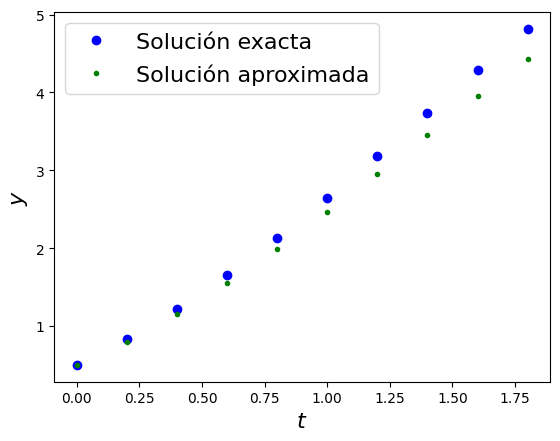

In [ ]:
def example1(tt, yy):
  return yy - tt**2 + 1
y_real = lambda tt: (tt+1)**2 - 0.5*np.exp(tt)

dt = 0.2
tw = np.arange(0, 2, dt)
N = len(tw)

y_approx = np.zeros(N)
y_approx[0] = 0.5   # Condicion incial

for ii in range(N-1):
  tt = ii*dt
  y_approx[ii+1] = euler_method(y_approx[ii], tt, example1, dt)

plot(tw, y_real(tw), 'bo', label='Solución exacta')
plot(tw, y_approx, 'g.', label='Solución aproximada')
xlabel('$t$', fontsize=16)
ylabel('$y$', fontsize=16)
legend(fontsize=16)



Resolvamos ahora el sistema lineal que vimos en clase

$$ A = \begin{pmatrix} -5 & 1 \\ 4 & -2 \end{pmatrix}$$

La solución exacta general era

$$ \mathbf{y} = c_1 e^{-t} \begin{pmatrix} 1 \\ 4 \end{pmatrix} + c_2 e^{-6t} \begin{pmatrix} -1 \\ 1 \end{pmatrix} $$

Con la condición inicial

$$ \mathbf{y} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$$

las constante quedan

$$ c_1 = \frac{3}{5}, \;\;\; c_2 = -\frac{2}{5} $$




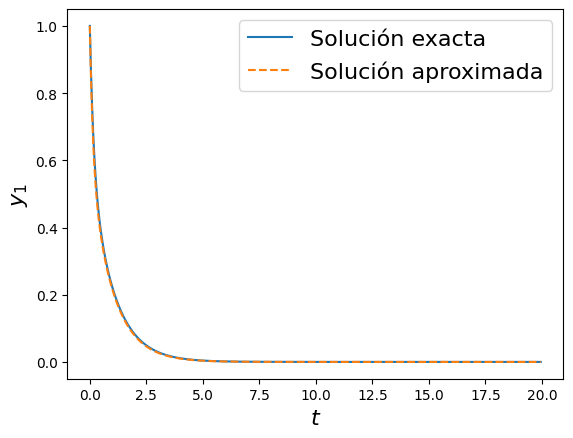

In [ ]:
def example2(tt, yy):
  A = np.array([[-5, 1], [4, -2]])
  return np.dot(A,yy)

def y_real(tt):
  c1 = 3/5
  c2 = -2/5
  v1 = np.array([1, 4])
  v2 = np.array([-1, 1])
  l1 = -1.0
  l2 = -6.0

  yy = c1*np.exp(l1*tt)*v1 + c2*np.exp(l2*tt)*v2
  return yy

dt = 0.05
tw = np.arange(0, 20, dt)
N = len(tw)

y_approx = np.zeros((N, 2))
# Condicion incial
y_approx[0][0] = 1
y_approx[0][1] = 2

for ii in range(N-1):
  tt = ii*dt
  y_approx[ii+1] = euler_method(y_approx[ii], tt, example2, dt)

y_eval = np.array([y_real(tt) for tt in tw])
plot(tw, y_eval[:, 0], label='Solución exacta')
plot(tw, y_approx[:, 0], label='Solución aproximada', ls='--')
xlabel('$t$', fontsize=16)
ylabel('$y_1$', fontsize=16)
legend(fontsize=16)

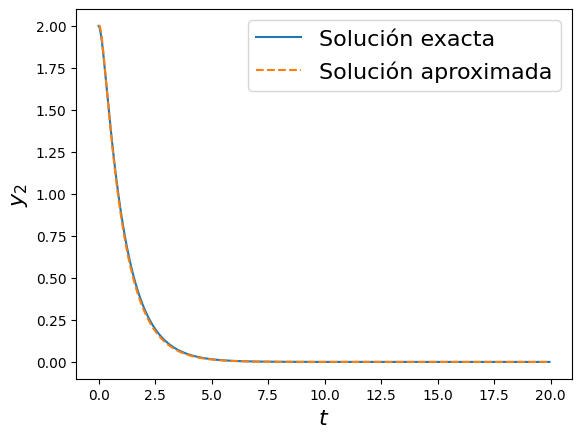

In [ ]:
plot(tw, y_eval[:, 1], label='Solución exacta')
plot(tw, y_approx[:, 1], label='Solución aproximada', ls='--')
xlabel('$t$', fontsize=16)
ylabel('$y_2$', fontsize=16)
legend(fontsize=16)

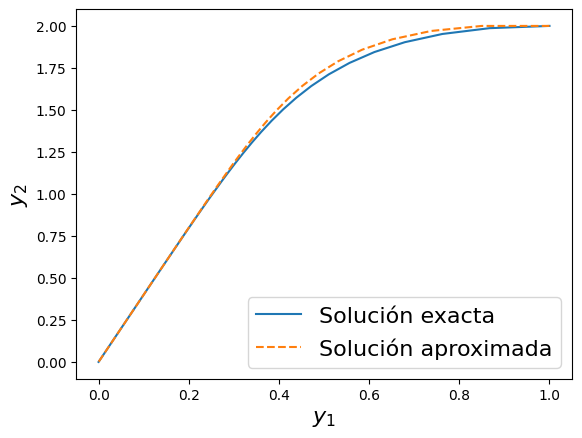

In [ ]:
plot(y_eval[:, 0], y_eval[:, 1], label='Solución exacta')
plot(y_approx[:, 0], y_approx[:, 1], label='Solución aproximada', ls='--')
xlabel('$y_1$', fontsize=16)
ylabel('$y_2$', fontsize=16)
legend(fontsize=16)

Resolvamos para muchas condiciones iniciales ahora


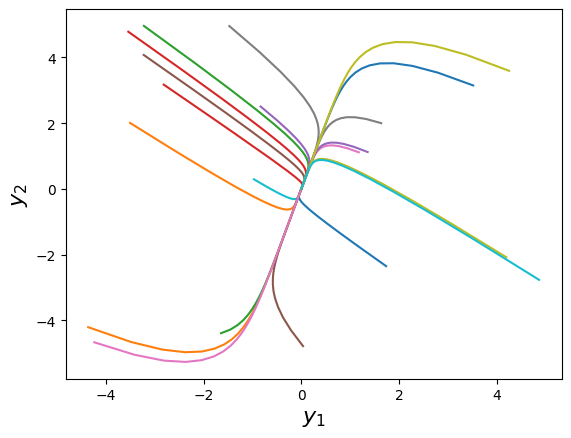

In [ ]:
dt = 0.05
tw = np.arange(0, 10, dt)
N = len(tw)

Ntrajs = 20
for traj in range(Ntrajs):
  y_approx = np.zeros((N, 2))
  # Condicion incial
  y_approx[0][0] = 10*np.random.rand() - 5
  y_approx[0][1] = 10*np.random.rand() - 5
  
  for ii in range(N-1):
    tt = ii*dt
    y_approx[ii+1] = euler_method(y_approx[ii], tt, example2, dt)
  
  y_eval = np.array([y_real(tt) for tt in tw])
  plot(y_approx[:, 0], y_approx[:, 1])
  xlabel('$y_1$', fontsize=16)
  ylabel('$y_2$', fontsize=16)

# Método de Runge-Kutta

In [ ]:
def int_rk4(f,t,x,dt,params):
    '''
    Integrador Runge-Kutta orden 4
    
    Resuelve dx/dt = f(t,x,params)
    
    Parameters
    ----------
    f : funcion que define las derivas
    t : tiempo
    x : vector de variables a tiempo t
    dt : paso temporal
    params : lista de parametros
    
    Results
    -------
    x : vector de variables a tiempo t+dt
    '''
    k1 = dt*f(t,x,params)
    k2 = dt*f(t+0.5*dt,x+0.5*k1,params)
    k3 = dt*f(t+0.5*dt,x+0.5*k2,params)
    k4 = dt*f(t+dt    ,x+k3,params)
    return x + k1/6 + k2/3 + k3/3 + k4/6

## Masa y resorte

La ecuación para una masa $m$ sujeta a un resorte de constante $k$ con fricción $\mu$ es:

$$ m \frac{d^2 y}{d t^2} + \mu \frac{dy}{dt} + k u = 0$$

Pasando esto a un sistema de dos variables:

$$ y'_1 = y_2 $$
$$ y'_2 = -\frac{\mu}{m} y_2 - k y_1 $$

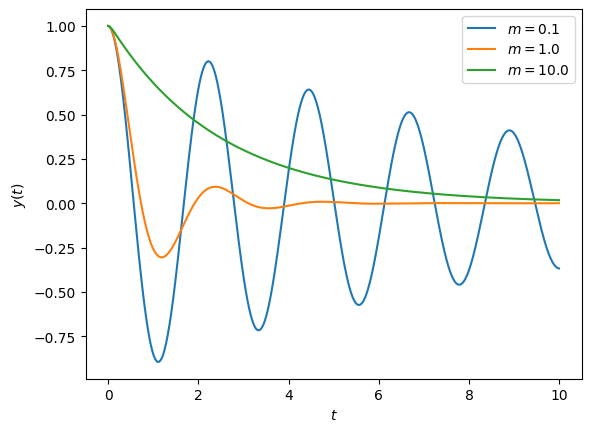

In [ ]:
def masa_resorte(tt, yy, params):
  mu = params[0]
  ma = params[1]
  kl = params[2]

  y1 = yy[0]
  y2 = yy[1]

  dy1 = y2
  dy2 = -(mu/ma)*y2 - kl*y1
  return np.array([dy1, dy2])

dt = 0.01
tw = np.arange(0, 10, dt)
N  = len(tw)

for mass in [0.1, 1.0, 10.0]:
  params   = [mass, 0.5, 8.0]
  y_approx = np.zeros((N, 2))
  # Condicion incial
  y_approx[0][0] = 1.0
  y_approx[0][1] = 0.0
  
  for ii in range(N-1):
    tt = ii*dt
    y_approx[ii+1] = int_rk4(masa_resorte, tt, y_approx[ii], dt, params)
  
  plot(tw, y_approx[:, 0], label=f'$m = {mass}$') 
  xlabel('$t$')
  ylabel('$y(t)$')
  legend()

## Problema stiff

In [ ]:
def stiff(t, u, pp):
  u1 = u[0]
  u2 = u[1]
  du1 = 9*u1 + 24*u2 + 5*cos(t) - (1/3)*sin(t)
  du2 = -24*u1 - 51*u2 - 9*cos(t) + (1/3)*sin(t)
  return np.array([du1, du2])

def stiff_sol(t):
  u1 = 2*np.exp(-3*t) - np.exp(-39*t) + (1/3)*cos(t)
  u2 = -np.exp(-3*t) + 2*np.exp(-39*t) - (1/3)*cos(t)
  return np.array([u1, u2])


In [ ]:
dt = 0.1
tw = np.arange(0, 1, dt)
N  = len(tw)

y_approx = np.zeros((N, 2))
# Condicion incial
y_approx[0][0] = 4/3
y_approx[0][1] = 2/3

for ii in range(N-1):
  tt = ii*dt
  y_approx[ii+1] = int_rk4(stiff, tt, y_approx[ii], dt, [])

(0.0, 2.0)

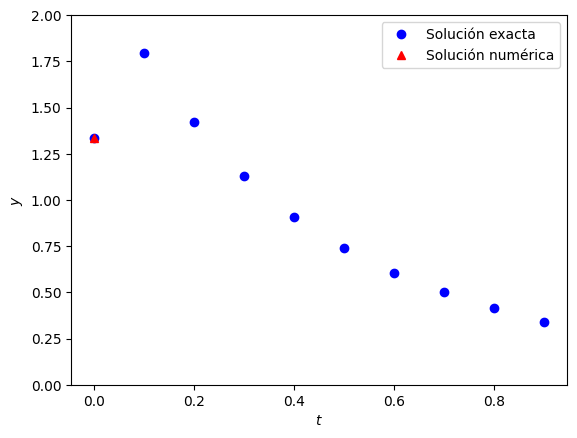

In [ ]:
plot(tw, stiff_sol(tw)[0], 'bo', label='Solución exacta')
plot(tw, y_approx[:, 0], 'r^', label='Solución numérica')
legend()
xlabel('$t$')
ylabel('$y$')
ylim(0, 2)

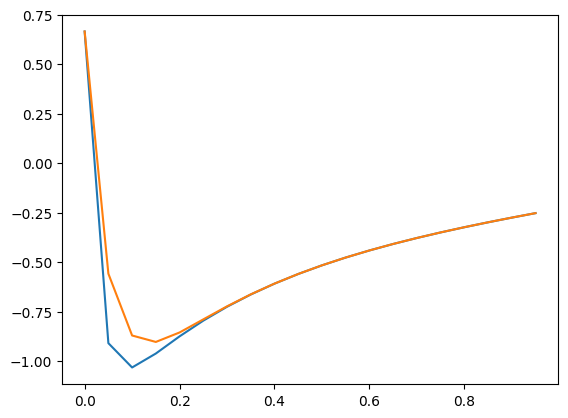

In [ ]:
plot(tw, stiff_sol(tw)[1])
plot(tw, y_approx[:, 1])